In [3]:
import pandas as pd
import numpy as np
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

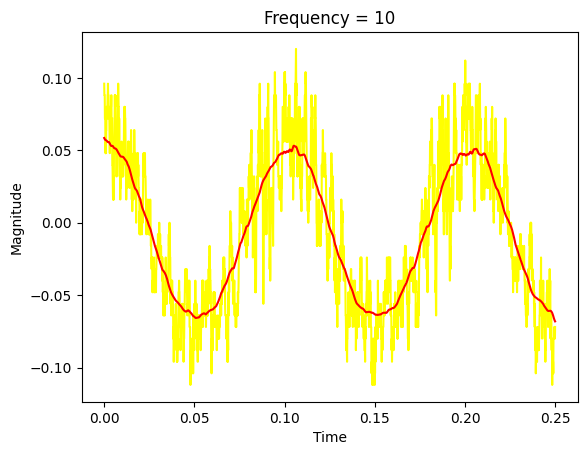

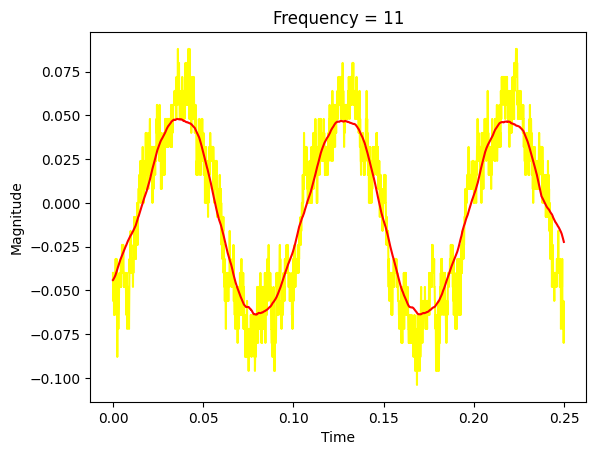

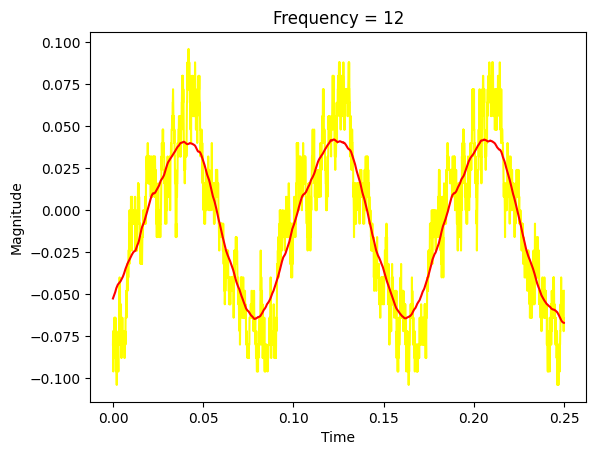

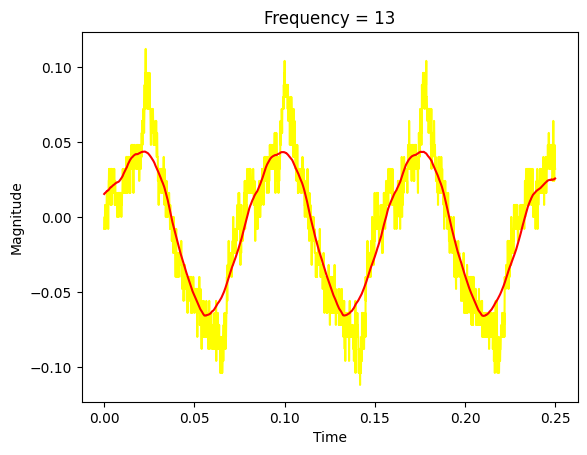

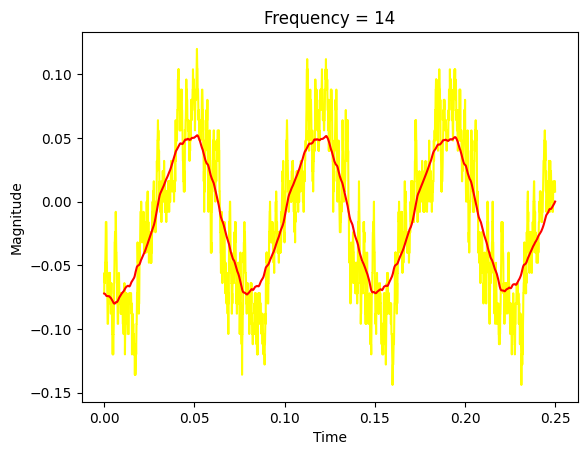

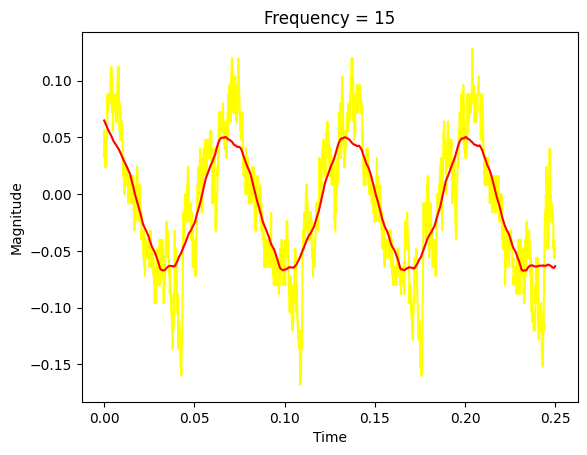

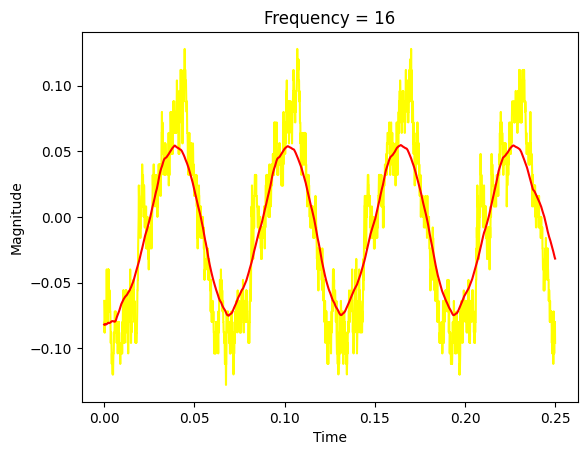

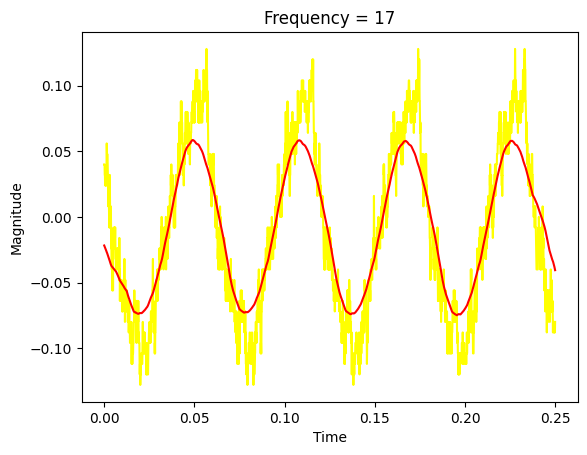

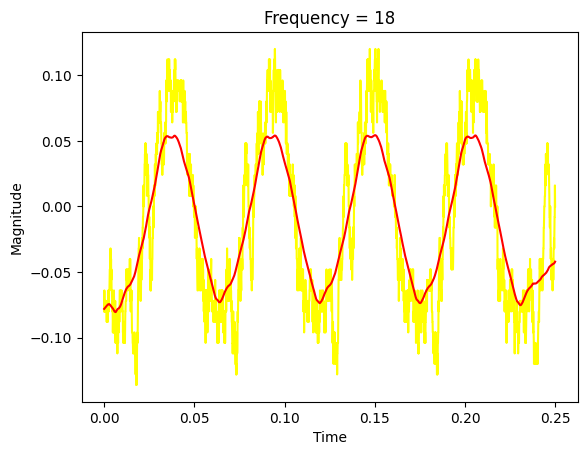

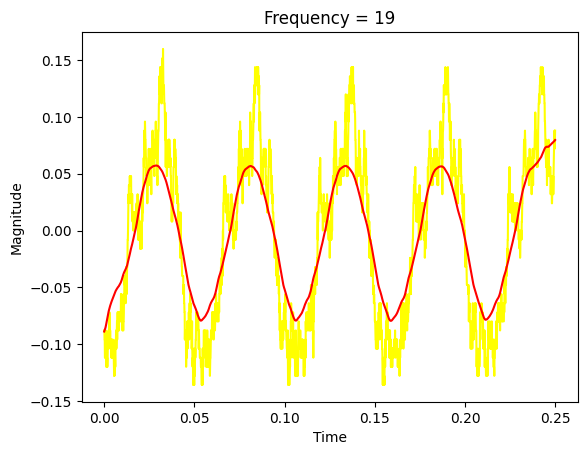

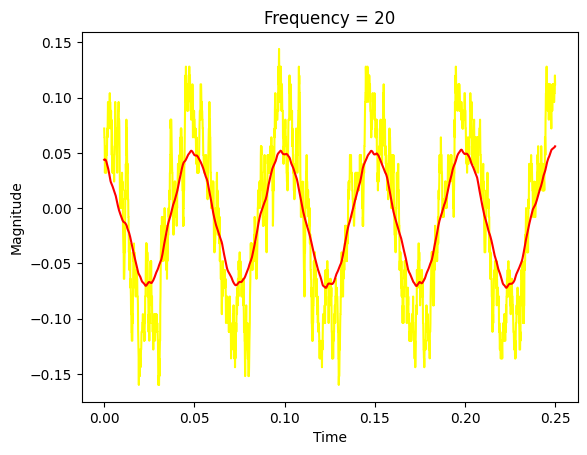

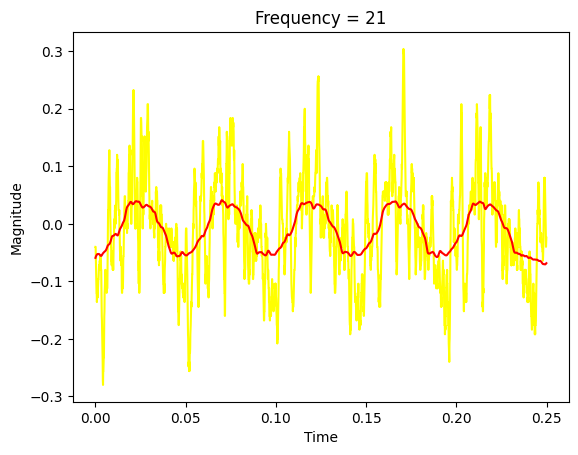

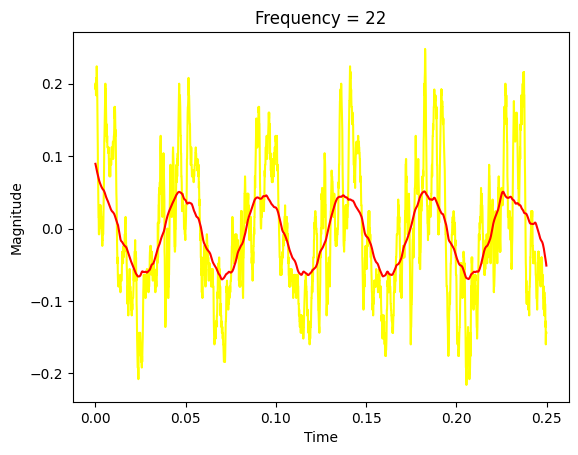

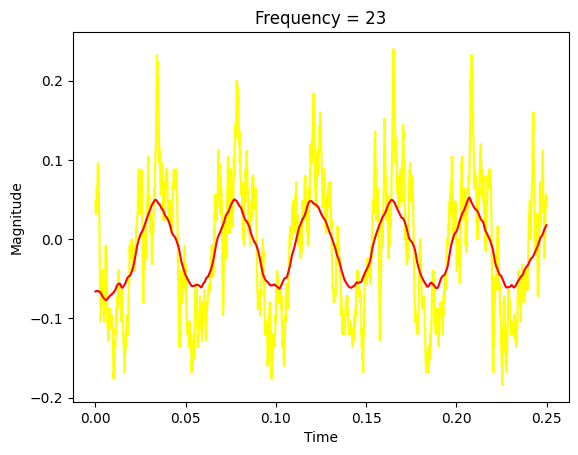

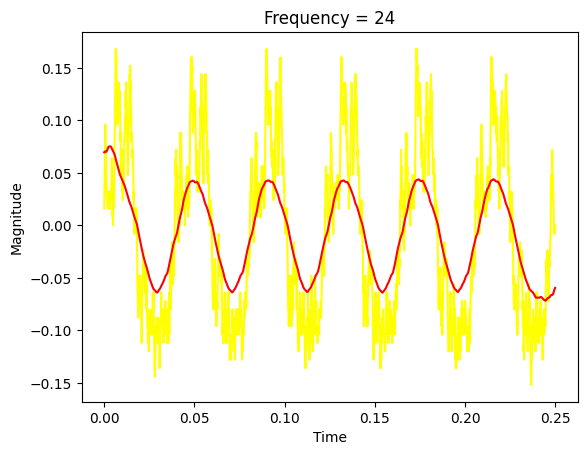

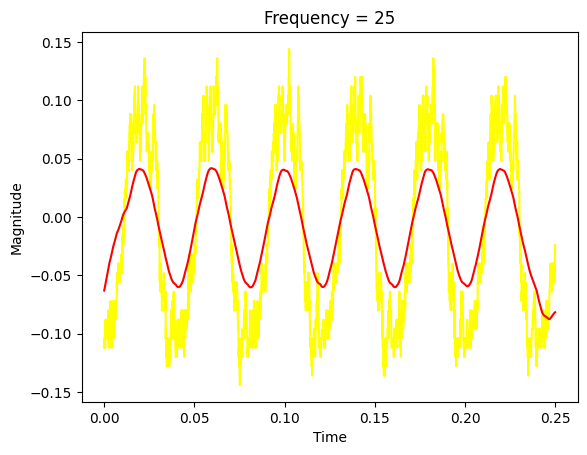

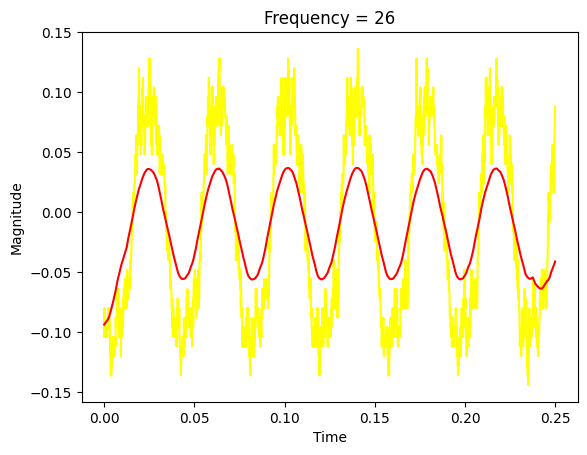

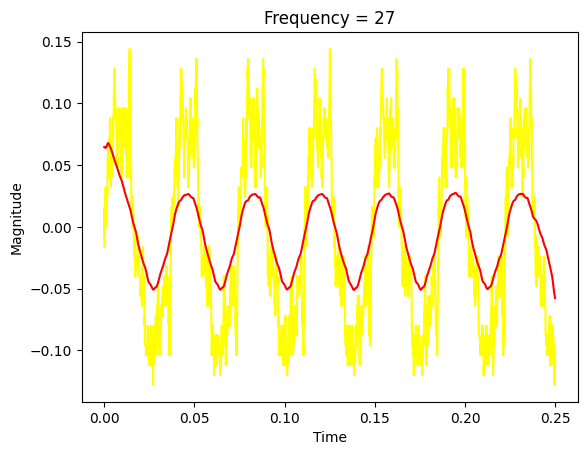

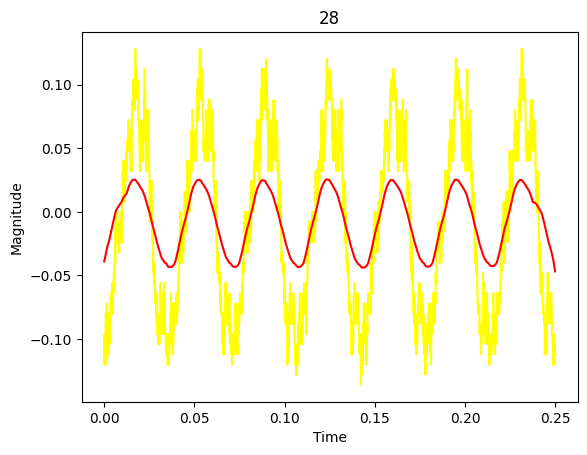

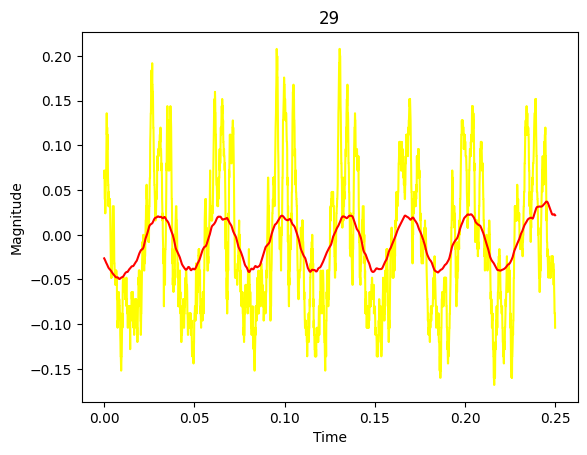

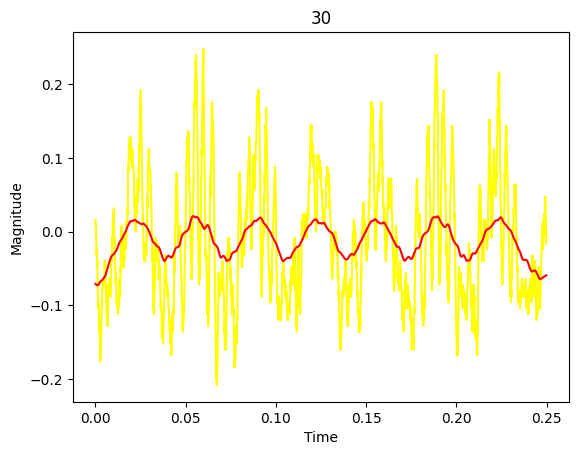

In [108]:
harmonics=[]
for i in range(2,24):
  if i==20:
    continue
  name = "F000"+str(i)+"CH1.CSV" if i<10 else "F00"+str(i)+"CH1.CSV"
  data = pd.read_csv(name)
  data[data.columns[0]]=data[data.columns[0]]+0.0040
  plt.plot(data[data.columns[0]],data['mag'],color='yellow')
  plt.title("Frequency = "+str(8+i) if i<=20 else str(7+i))
  plt.xlabel("Time")
  plt.ylabel("Magnitude")
  trend = data['mag'].rolling(
      window=250,
      center=True,
      min_periods=6
  ).mean()
  plt.plot(data[data.columns[0]],trend,color='red')
  plt.show()
  fourier = fft(trend.values)
  harmonic, content=0,0
  for  j in range(2,100):
    if fourier[j]>content:
      content=fourier[j];
      harmonic=j

  harmonics.append(harmonic)

In [109]:
harmonics

[2, 2, 4, 3, 4, 4, 2, 5, 5, 4, 5, 6, 5, 6, 6, 7, 7, 6, 2, 7, 8]

In [110]:
harmonics.pop(6)

2

In [111]:
harmonics.pop(17)

2

In [112]:
harmonics

[2, 2, 4, 3, 4, 4, 5, 5, 4, 5, 6, 5, 6, 6, 7, 7, 6, 7, 8]

Text(0, 0.5, 'Pre-dominant Harmonic')

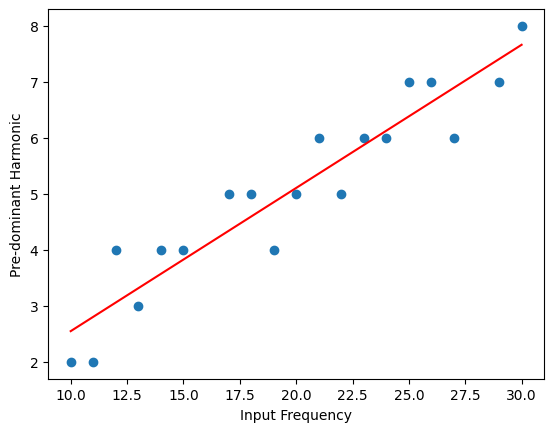

In [113]:
x=[]
sub=10
for i in range(10,31):
  if i!=16 and i!=28:
    x.append(i)

plt.scatter(x,harmonics)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.array(x).reshape(-1,1),np.array(harmonics).reshape(-1,1))
plt.plot(x,model.predict(np.array(x).reshape(-1,1)),color="red")
plt.xlabel("Input Frequency")
plt.ylabel("Pre-dominant Harmonic")

In [114]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(harmonics,model.predict(np.array(x).reshape(-1,1)))

0.49260006592010813

Thus, the most pre-dominant harmonic will be within +- 0.493 of the value predicted by our model

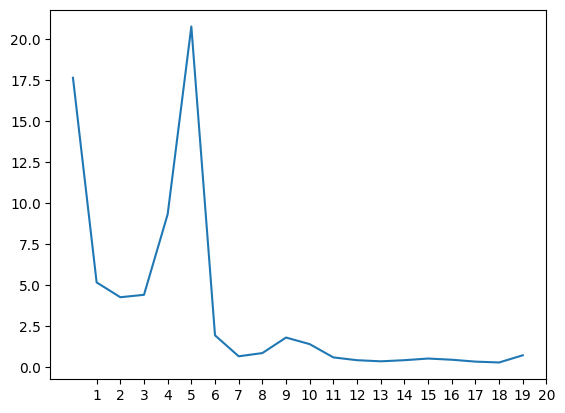

In [ ]:
'''plt.plot(np.abs(fourier)[0:20])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.show()'''

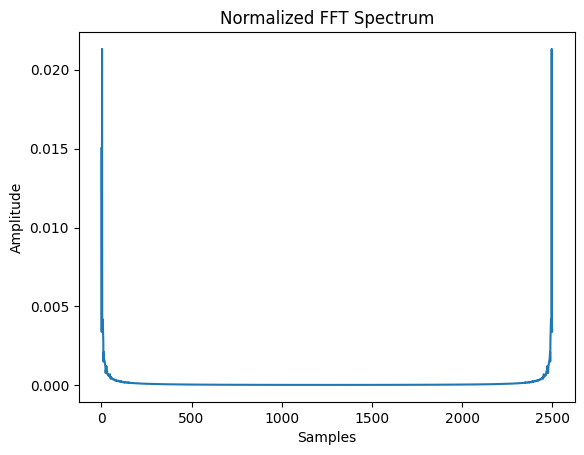

In [ ]:
'''# Calculate N/2 to normalize the FFT output
N = len(trend)
normalize = N/2

# Plot the normalized FFT (|Xk|)/(N/2)
plt.plot(np.abs(fourier)/normalize)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title('Normalized FFT Spectrum')
plt.show()'''